In [11]:
from pythainlp import word_tokenize, pos_tag
from collections import Counter
from tqdm import tqdm

import pandas as pd


In [4]:
df = pd.read_json('~/Documents/matichon.json')
df = df[["article"]]

In [5]:
df = df.head(50000)

In [9]:
df["token"] = df["article"].apply(word_tokenize)
print("tokenize finished")
df["pos"] = df["token"].apply(lambda x: pos_tag(x, corpus="orchid_ud"))

In [10]:
pos_tag(word_tokenize("ไปเรียนไหม"), corpus="orchid_ud")

[('ไป', 'VERB'), ('เรียน', 'VERB'), ('ไหม', 'ADV')]

In [10]:
df

,article,token,pos
0,วันที่ 7 มีนาคม พล.ร.อ.ไกรสร จันทร์สุวานิชย์ ผ...,"[วันที่, , 7, , มีนาคม, , พล, ., ร.อ., ไกรส...","[(วันที่, NOUN), ( , PUNCT), (7, NUM), ( , PUN..."
1,17 ส.ค. – นายพัฒนะ พลศรี หัวหน้าฝ่ายส่งน้ำและบ...,"[17, , ส.ค., , –, , นาย, พัฒนะ, , พล, ศรี,...","[(17, NUM), ( , PUNCT), (ส.ค., NOUN), ( , PUNC..."
2,พลเอกประยุทธ์ จันทร์โอชา นายกรัฐมนตรี และหัวหน...,"[พลเอก, ประยุทธ์, , จันทร์, โอชา, , นายกรัฐม...","[(พลเอก, NOUN), (ประยุทธ์, NOUN), ( , PUNCT), ..."
3,คำแถลงของคุณสุเทพ เทือกสุบรรณ หลังลาสิกขาดูเหม...,"[คำแถลง, ของ, คุณ, สุเทพ, , เทือก, สุบรรณ, ,...","[(คำแถลง, NOUN), (ของ, ADP), (คุณ, PRON), (สุเ..."
4,(16 ส.ค.58) สำนักข่าวซีเอ็นเอ็นรายงานว่า ทางกา...,"[(, 16, , ส.ค., 58, ), , สำนักข่าว, ซีเอ็นเอ...","[((, PUNCT), (16, NUM), ( , PUNCT), (ส.ค., NOU..."
...,...,...,...
49995,แคม นิวตัน ควอเตอร์แบ๊กรางวัลผู้เล่นทรงคุณค่า ...,"[แคม, , นิวตัน, , ค, วอเตอร์, แบ๊, กราง, วัล...","[(แคม, NOUN), ( , PUNCT), (นิวตัน, NOUN), ( , ..."
49996,เชิญผู้ที่ชื่นชอบอาหารและความบันเทิงจากหลากหลา...,"[เชิญ, ผู้, ที่, ชื่นชอบ, อาหาร, และ, ความบันเ...","[(เชิญ, NOUN), (ผู้, PRON), (ที่, SCONJ), (ชื่..."
49997,ความคืบหน้าเฟซบุ๊กแชร์ภาพเด็กสองขวบถูกชนเสียชี...,"[ความคืบหน้า, เฟซบุ๊ก, แชร์, ภาพ, เด็ก, สอง, ข...","[(ความคืบหน้า, NOUN), (เฟซบุ๊ก, NOUN), (แชร์, ..."
49998,อัลคาเทล (Alcatel) แบรนด์โทรศัพท์มือถือภายใต้ก...,"[อัลคาเทล, , (, Alcatel, ), , แบรนด์, โทรศัพ...","[(อัลคาเทล, NOUN), ( , PUNCT), ((, PUNCT), (Al..."


In [12]:
trans = Counter()
ditrans = Counter()

trans_bigram = Counter()
ditrans_trigram = Counter()

for tokens in tqdm(df.pos):
    for i in range(len(tokens)-2):
        token0, pos0 = tokens[i][0], tokens[i][1]
        token1, pos1 = tokens[i+1][0], tokens[i+1][1]
        token2, pos2 = tokens[i+2][0], tokens[i+2][1]
        if pos0 == "VERB" and pos1 =="NOUN":
            trans[token0] += 1
            trans_bigram[(token0, token1)] += 1
            if pos2 == "NOUN":
                ditrans[token0] += 1
                ditrans_trigram[(token0, token1, token2)] += 1

100%|██████████| 50000/50000 [00:13<00:00, 3810.83it/s]


In [39]:
df_trans = pd.DataFrame(trans.most_common(), columns=["verb", "count"])
df_ditrans = pd.DataFrame(ditrans.most_common(), columns=["verb", "count"])
df_ditrans = df_ditrans[df_ditrans["count"] > 500]
merged = pd.merge(df_ditrans, df_trans, how="inner", on="verb")
merged["rate"] = merged.count_x / merged.count_y * 100
merged = merged.sort_values("rate", ascending=False)
merged.columns = ["verb", "count_DT","count_T","rate"]
merged.to_csv("ditransitive_rate.csv",index=False)
merged

,verb,count_DT,count_T,rate
102,มหา,753,821,91.717418
146,เท,505,792,63.762626
10,วัด,4677,7628,61.313582
112,ยู,697,1169,59.623610
49,ขับเคลื่อน,1494,2585,57.794971
...,...,...,...,...
148,รวบรวม,503,2316,21.718480
0,มี,49458,229227,21.575992
23,ส่ง,2554,11871,21.514615
60,แสดง,1246,5816,21.423659


In [144]:
df_trans.to_csv("trans.csv",index=False)
df_ditrans.to_csv("ditrans.csv",index=False)

In [37]:
print(*merged.verb.to_list(), sep="\n")

วัด
ขับเคลื่อน
รักษา
กล่าว
รอง
พร้อม
ตรวจ
อยู่
ร่วมกับ
จัดทำ
เปิด
พบ


เข้าสู่
เดิน
ติด
กำหนด
พัฒนา
ขยาย
เรียก
กล่าวถึง
ใส่
ช่วย
ปรับ
ขอ
ลด
เข้า
ส่งเสริม
ติดตาม
เก็บ
จัดการ
ขอให้
จัด
เตรียม
ใช้
นำ
ทำให้
ไป
ดำเนิน
จ่าย
เล่น
รวมถึง
ตั้ง
ผ่าน
ตรวจสอบ
ซื้อ
ขาย
เพิ่ม
รวม
เห็น
กลายเป็น
เสนอ
ร่วม
ทำ
ดู
เป็น
รับ
ทราบ
สนับสนุน
ดูแล
ลง
รอ
ปลูก
คือ
ประกอบ
เลือก
ให้
ยังมี
หา
ถือเป็น
ใช่
ได้
เอา
เกิด
สร้าง
มี
ส่ง
แสดง
ได้รับ


In [30]:
ditrans_trigram.most_common(20)

[(('รักษา', 'ความสงบ', 'แห่งชาติ'), 3104),
 (('มี', 'ฝน', 'ฟ้าคะนอง'), 1322),
 (('อยู่', 'บ้าน', 'เลขที่'), 977),
 (('กล่าว', '\n', 'นาย'), 930),
 (('ขับเคลื่อน', 'การปฏิรูป', 'ประเทศ'), 838),
 (('วัด', 'พระ', 'ธรรมกาย'), 786),
 (('มหา', 'รัช', 'มัง'), 619),
 (('ใช้', 'อาวุธ', 'ปืน'), 584),
 (('หลักประกัน', 'สุขภาพ', 'แห่งชาติ'), 438),
 (('เป็น', 'ประธาน', 'การประชุม'), 432),
 (('มี', 'ปริมาณ', 'น้ำ'), 395),
 (('รับ', 'จำนำ', 'ข้าว'), 352),
 (('กล่าว', '\n', 'ผู้สื่อข่าว'), 316),
 (('ตกหนัก', 'บางแห่ง', '\n'), 312),
 (('ใช้', 'สิทธิ', 'ออกเสียง'), 284),
 (('มี', 'อัตรา', 'การ'), 262),
 (('รอง', 'ผู้บัญชาการ', 'ตำรวจ'), 249),
 (('นำ', 'ตัว', 'นาย'), 238),
 (('เท', 'พญาณ', 'มหา'), 234),
 (('มี', 'อาวุธ', 'ปืน'), 230)]

,verb,count_x,count_y,rate
676,เลสเต,75,75,100.000000
1436,มปิก,25,25,100.000000
1019,ปรีดิ,41,41,100.000000
1107,สงขลา,38,39,97.435897
324,เมธี,200,206,97.087379
449,สำนักงานเขต,129,133,96.992481
556,บาท,101,105,96.190476
1453,ลพบุรี,25,26,96.153846
917,สเต็ม,48,50,96.000000
908,พระองค์เจ้า,48,50,96.000000


a b c phi : 10.311710323397081 5.36931546858284 -11.28463466784702 1.3636673610499093


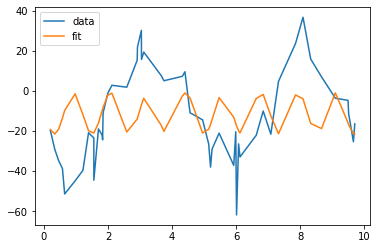

In [142]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

## create data : y = 30cos(1.3x+2) - 8
np.random.seed(42)
xs = np.sort(np.random.uniform(0, 10, size=50))
ys = np.cos(1.3*xs + 2) * 30 - 8
noise = np.random.randn(len(xs)) * 10
ys = ys + noise

## cos function for fitting
def func_cos(x, a, b, c, phi):
    return a * np.cos(b * x + phi) + c

## fit
popt, pcov = curve_fit(func_cos, xs, ys, bounds=((-50,0,-50,0),(100,10,100,6)))
ys_fit = func_cos(xs, *popt)
print("a b c phi :", *popt)

plt.plot(xs, ys, label="data")
plt.plot(xs, ys_fit, label="fit")
plt.legend()

In [108]:
14.55 - np.pi*4

1.9836293856408282

In [77]:
start=list(range(n,0,-1));end=[];tmp=[];i=0

def print_hanoi():
    print(start,end,tmp)

def hanoi(n,start,end,tmp):
    if n<=0:
        return
    hanoi(n-1,start,end,tmp)
    end.append(start.pop())
    print_hanoi()
    global i; i+=1
hanoi(n-1,start,end,tmp)

[0.008386665604089849,
 0.016064231320966904,
 0.016109513427854383,
 0.02220512381415296,
 0.027516030702906535,
 0.04058091564454025,
 0.0511391331022526,
 0.06477595773872191,
 0.0950264731807593,
 0.10365043230927795,
 0.1061915936336233,
 0.10694809425471408,
 0.11274759090143194,
 0.13013211934966296,
 0.18356617854452417,
 0.2019847424298682,
 0.2044962398005723,
 0.20485804673741503,
 0.21671860422587508,
 0.21724471913478371,
 0.21726812416170915,
 0.21734930266031904,
 0.23662656993897913,
 0.23685249515140838,
 0.2513167202552302,
 0.2513389609877281,
 0.2700229909673846,
 0.2702376513518501,
 0.2754785632015344,
 0.28295454867299674,
 0.3049945871397608,
 0.31460862262614464,
 0.31580672152798583,
 0.32388601711880405,
 0.3352080321409623,
 0.3533442156915134,
 0.3584504707359093,
 0.3619006760955201,
 0.36238018501879465,
 0.3799159201257152,
 0.38954326761186153,
 0.3898364005321242,
 0.3932868713338855,
 0.40154396059691844,
 0.4045796214481123,
 0.40490375770321996,
 0.